In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
from helpers.eda import *
from helpers.data_prep import *

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format" , lambda x : "%.4f" %x)
pd.set_option("display.width", 200)

In [5]:
def check_na_values(dataframe):
    
    na_values = dataframe.isnull().sum()
    na_values = pd.DataFrame(na_values)
    na_values.columns = ["NA_Values"]
    na_values = na_values[na_values["NA_Values"] > 0 ]
    return na_values

In [6]:
path = "/Users/gokhanersoz/Desktop/VBO_Dataset/diabetes.csv"

In [7]:
diabetes = pd.read_csv(path)

In [8]:
df = diabetes.copy()
print("DataFrame Shape : {}".format(df.shape))

DataFrame Shape : (768, 9)


In [9]:
check_na_values(df)

,NA_Values


In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


In [11]:
desc = df.describe().T
desc[desc["min"] == 0]

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0000,3.8451,3.3696,0.0000,1.0000,3.0000,6.0000,17.0000
Glucose,768.0000,120.8945,31.9726,0.0000,99.0000,117.0000,140.2500,199.0000
BloodPressure,768.0000,69.1055,19.3558,0.0000,62.0000,72.0000,80.0000,122.0000
SkinThickness,768.0000,20.5365,15.9522,0.0000,0.0000,23.0000,32.0000,99.0000
Insulin,768.0000,79.7995,115.2440,0.0000,0.0000,30.5000,127.2500,846.0000
BMI,768.0000,31.9926,7.8842,0.0000,27.3000,32.0000,36.6000,67.1000
Outcome,768.0000,0.3490,0.4770,0.0000,0.0000,0.0000,1.0000,1.0000


In [12]:
df_new = pd.read_csv(path,
                     na_values= {"Glucose" : 0 , "BloodPressure" : 0, "SkinThickness" : 0 , 
                                 "Insulin" : 0 , "BMI" : 0})

df = df_new.copy()

In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Analysis

In [14]:
check_df(df)

##################### SHAPE ######################

(768, 9)

##################### TYPES ######################

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

###################### HEAD ######################

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6 148.0000        72.0000        35.0000      NaN 33.6000                    0.6270   50        1
1            1  85.0000        66.0000        29.0000      NaN 26.6000                    0.3510   31        0
2            8 183.0000        64.0000            NaN      NaN 23.3000                    0.6720   32        1
3            1  89.0000        66.0000        23.00

In [15]:
cat_cols, num_cols , cat_but_car = grab_col_names(df,details=True)

Observations : 768
Variables : 9
Cat Cols : 1
Num Cols : 8
Cat But Car : 0
Num But Cat : 1


In [16]:
print("Cat Cols :\n", cat_cols,end = "\n\n")
print("Num Cols :\n", num_cols,end = "\n\n")
print("Cat But Car :\n ", cat_but_car)

Cat Cols :
 ['Outcome']

Num Cols :
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Cat But Car :
  []


   OUTCOME   RATIO
0      500 65.1042
1      268 34.8958

##################################################



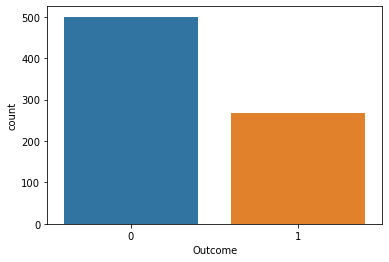

In [17]:
for cat in cat_cols:
    cat_summary(df, cat ,plot = True)

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

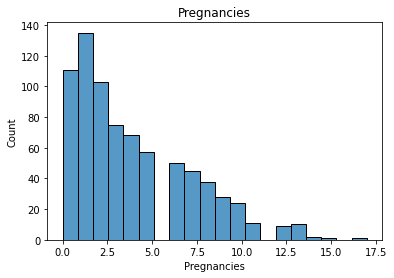

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

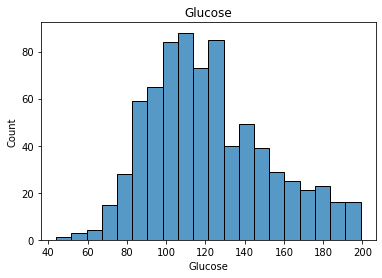

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

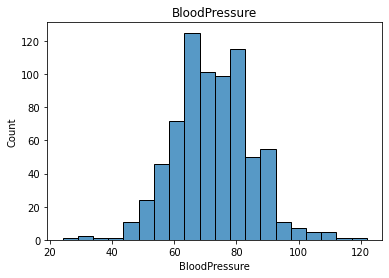

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

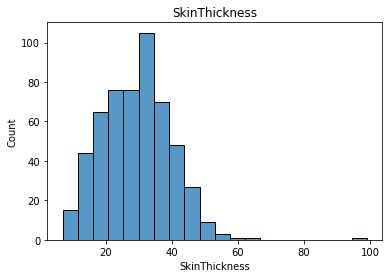

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

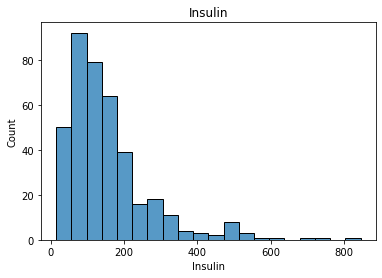

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

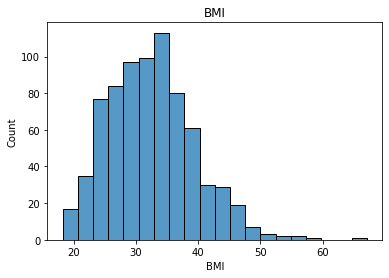

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

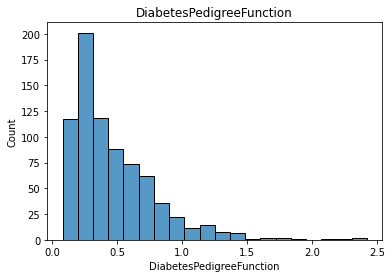

                            count     mean      std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%      99%      max
Pregnancies              768.0000   3.8451   3.3696  0.0000  0.0000  0.0000  1.0000   1.0000   2.0000   3.0000   4.0000   5.0000   7.0000   9.0000  10.0000  13.0000  17.0000
Glucose                  763.0000 121.6868  30.5356 44.0000 80.0000 86.2000 95.0000 102.0000 109.0000 117.0000 125.0000 135.0000 147.0000 167.0000 181.0000 196.0000 199.0000
BloodPressure            733.0000  72.4052  12.3822 24.0000 52.0000 58.0000 62.0000  66.0000  70.0000  72.0000  75.0000  78.0000  82.0000  88.0000  92.0000 106.0000 122.0000
SkinThickness            541.0000  29.1534  10.4770  7.0000 13.0000 16.0000 19.0000  23.0000  27.0000  29.0000  32.0000  34.0000  38.0000  42.0000  46.0000  53.2000  99.0000
Insulin                  394.0000 155.5482 118.7759 14.0000 41.6500 50.3000 69.2000  87.9000 105.0000 125.0000 145.8000 176.0000 2

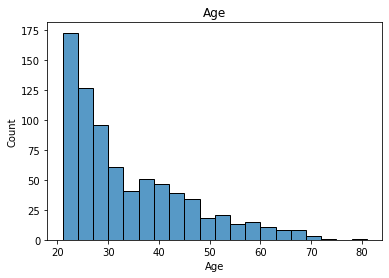

In [18]:
for num in num_cols:
    num_summary(df , num ,plot = True)

In [19]:
for num in num_cols:
    target_summary_with_num(df, "Outcome", num)

         Pregnancies
Outcome             
0             3.2980
1             4.8657

         Glucose
Outcome         
0       110.6439
1       142.3195

         BloodPressure
Outcome               
0              70.8773
1              75.3214

         SkinThickness
Outcome               
0              27.2355
1              33.0000

         Insulin
Outcome         
0       130.2879
1       206.8462

            BMI
Outcome        
0       30.8597
1       35.4068

         DiabetesPedigreeFunction
Outcome                          
0                          0.4297
1                          0.5505

            Age
Outcome        
0       31.1900
1       37.0672



In [20]:
for cat in cat_cols:
    target_summary_with_cat(df , "Outcome" , cat)

         TARGET_MEAN
Outcome             
0                  0
1                  1



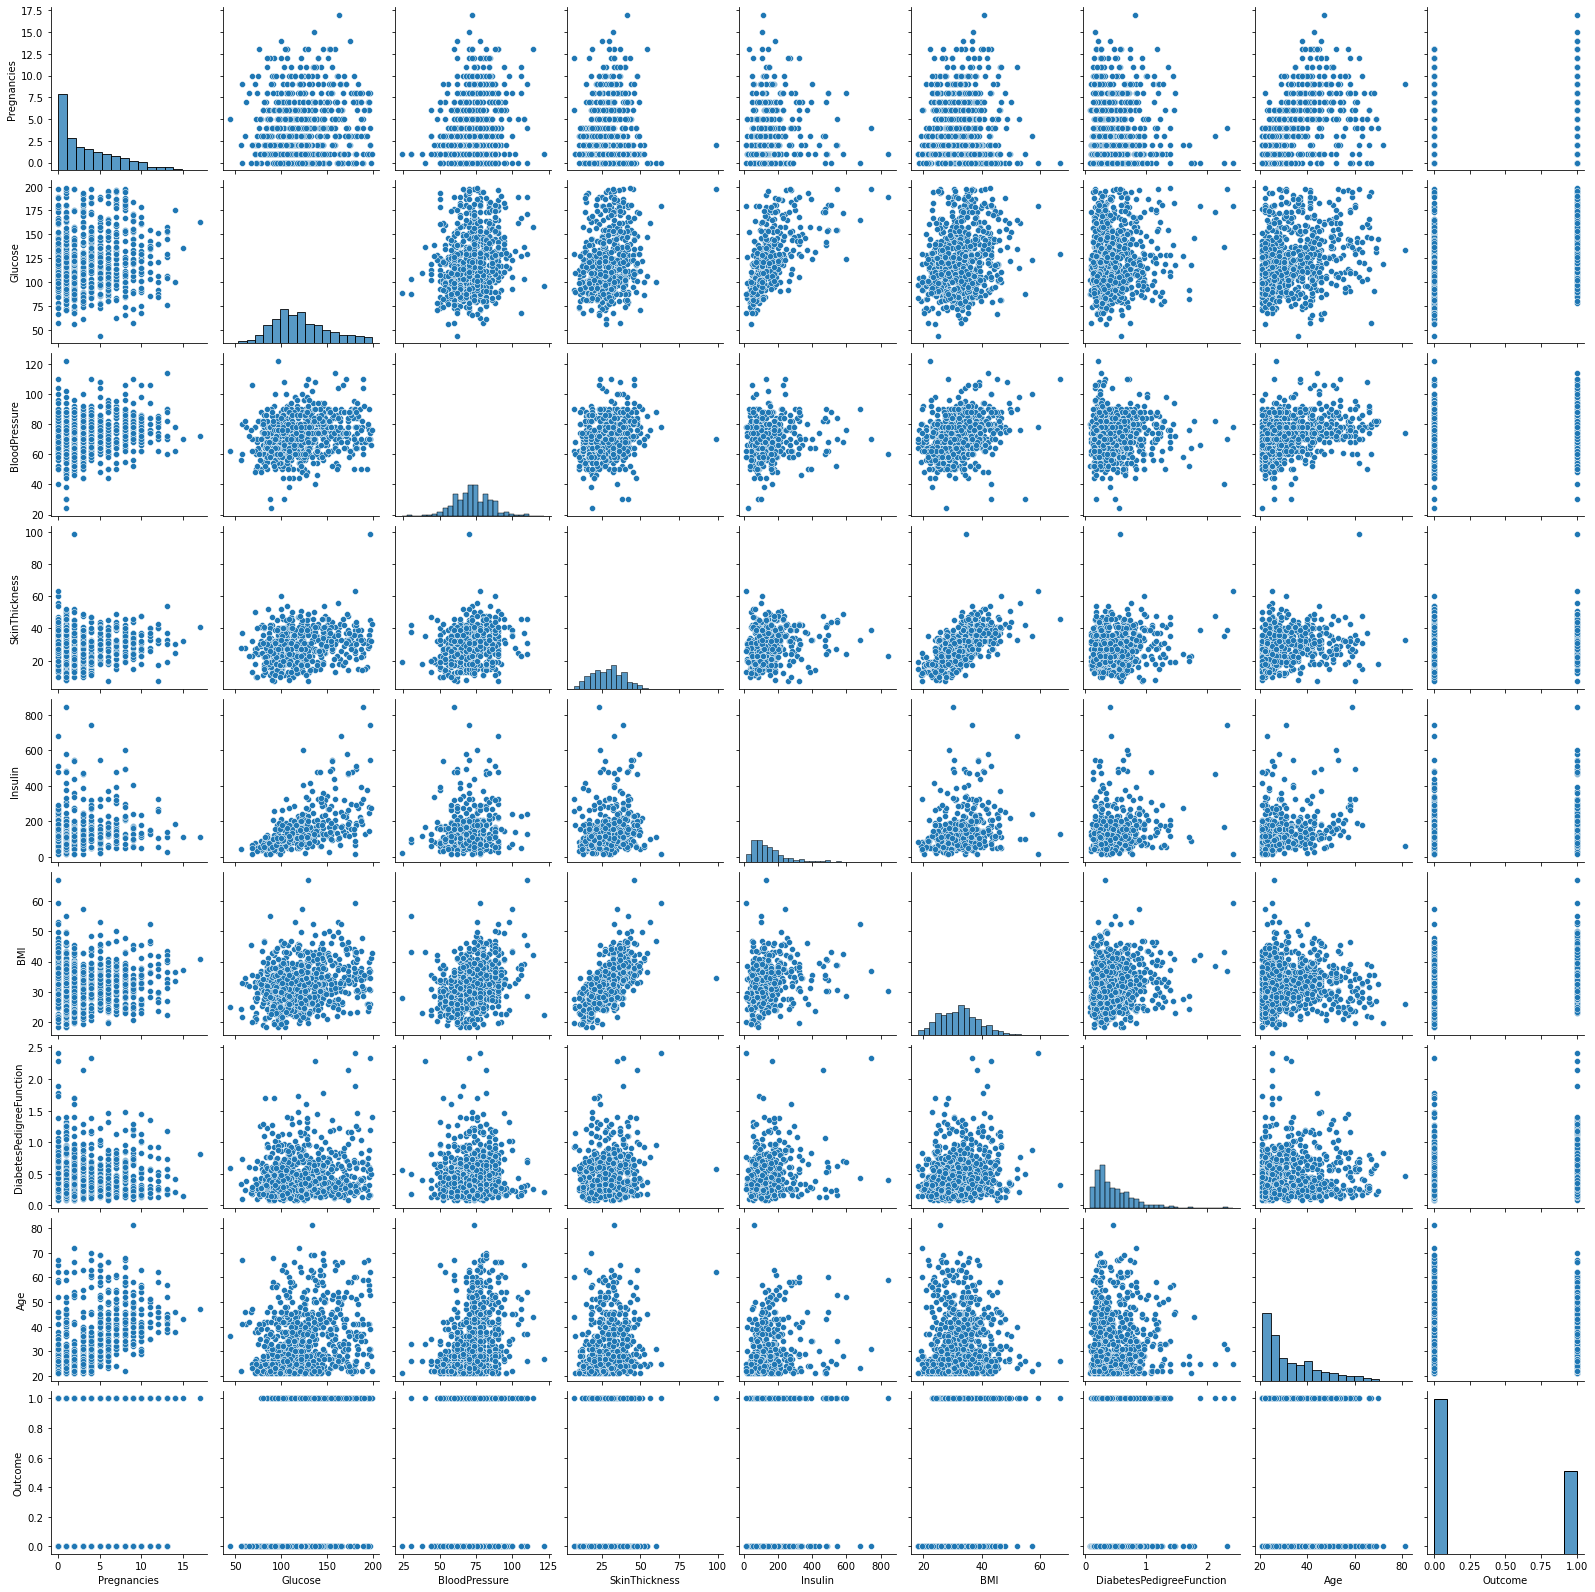

In [21]:
sns.pairplot(df)
plt.show()

## NA_Values

In [22]:
na_values = missing_values_table(df , na_name=True)

               n_miss   ratio
Insulin           374 48.6980
SkinThickness     227 29.5570
BloodPressure      35  4.5570
BMI                11  1.4320
Glucose             5  0.6510



In [23]:
missing_vs_target(df ,"Outcome", na_values)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                     0.3486    763
1                     0.4000      5

                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                           0.3438    733
1                           0.4571     35

                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                           0.3327    541
1                           0.3877    227

                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                     0.3299    394
1                     0.3690    374

             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                 0.3514    757
1                 0.1818     11



In [24]:
median = df.groupby("Outcome").median().iloc[:,1:-2]
median

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Outcome,,,,,
0,107.0000,70.0000,27.0000,102.5000,30.1000
1,140.0000,74.5000,32.0000,169.5000,34.3000


In [25]:
df[["Outcome"]].value_counts()

Outcome
0          500
1          268
dtype: int64

In [26]:
na_values

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [27]:
def distplot_na_values(dataframe,na_values):
    
    i = 1 
    num = len(na_values)
    size = 15
    plt.figure(figsize = (10,15))
    
    for na_value in na_values:
        
        plt.subplot(num,1,i)
        sns.distplot(dataframe[na_value])
        
        plt.title(na_value , fontsize = size)
        plt.xlabel(na_value, fontsize = size)
        plt.ylabel("Density" , fontsize = size)
        i+=1
        plt.tight_layout()
        
        
        
    plt.show()

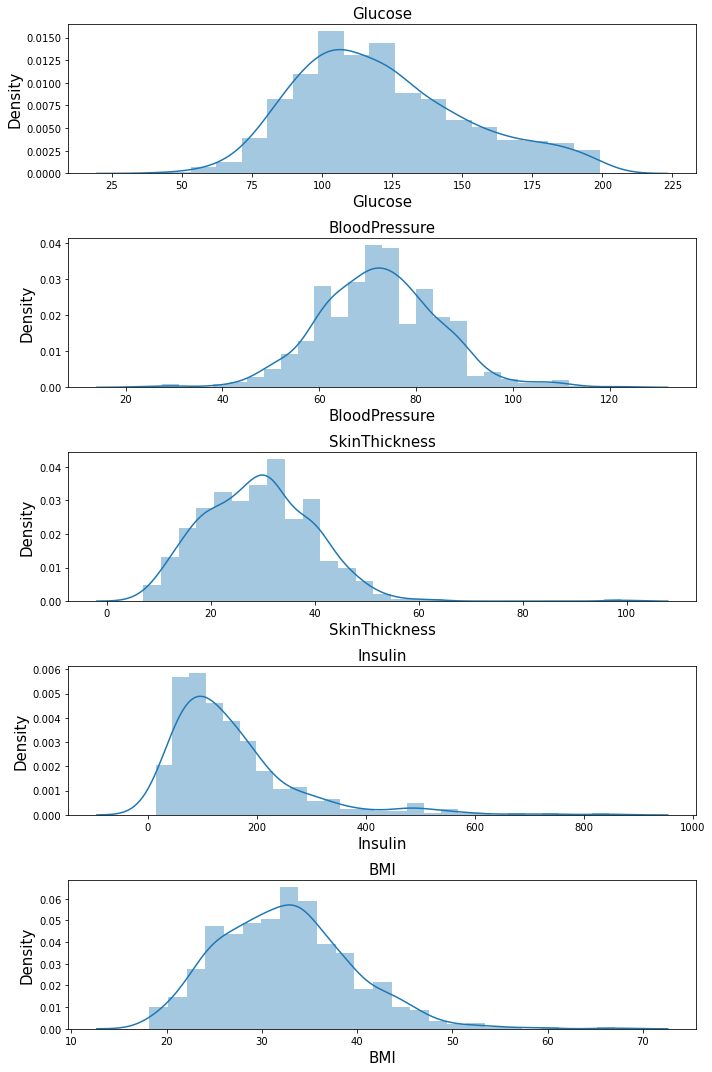

In [28]:
distplot_na_values(df , na_values)

In [29]:
for na_col in na_values:
    df.loc[ ((df["Outcome"] == 0) & (df[na_col].isnull())), na_col] = df.groupby("Outcome")[na_col].median()[0]
    df.loc[ ((df["Outcome"] == 1) & (df[na_col].isnull())), na_col] = df.groupby("Outcome")[na_col].median()[1]

In [30]:
check_na_values(df)

,NA_Values


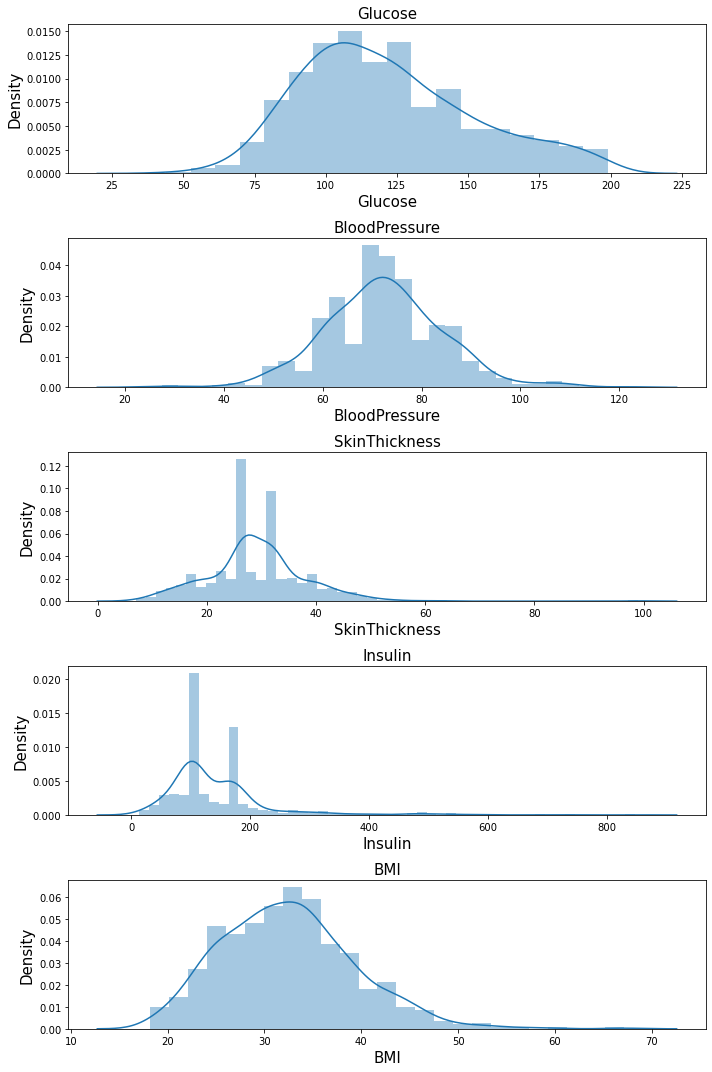

In [31]:
distplot_na_values(df , na_values)

In [32]:
def boxplot(dataframe, num_cols):
    
    i=1
    num_ = (len(num_cols))
    plt.figure(figsize = (20,20))
    size =15
    
    for num in num_cols:
        
        plt.subplot(num_,1,i)
        sns.boxplot(dataframe[num])
        plt.xlabel(f"{num}", fontsize = size)
        plt.title(f"{num}" , fontsize = size)
        i+=1
        plt.tight_layout()
    plt.show()

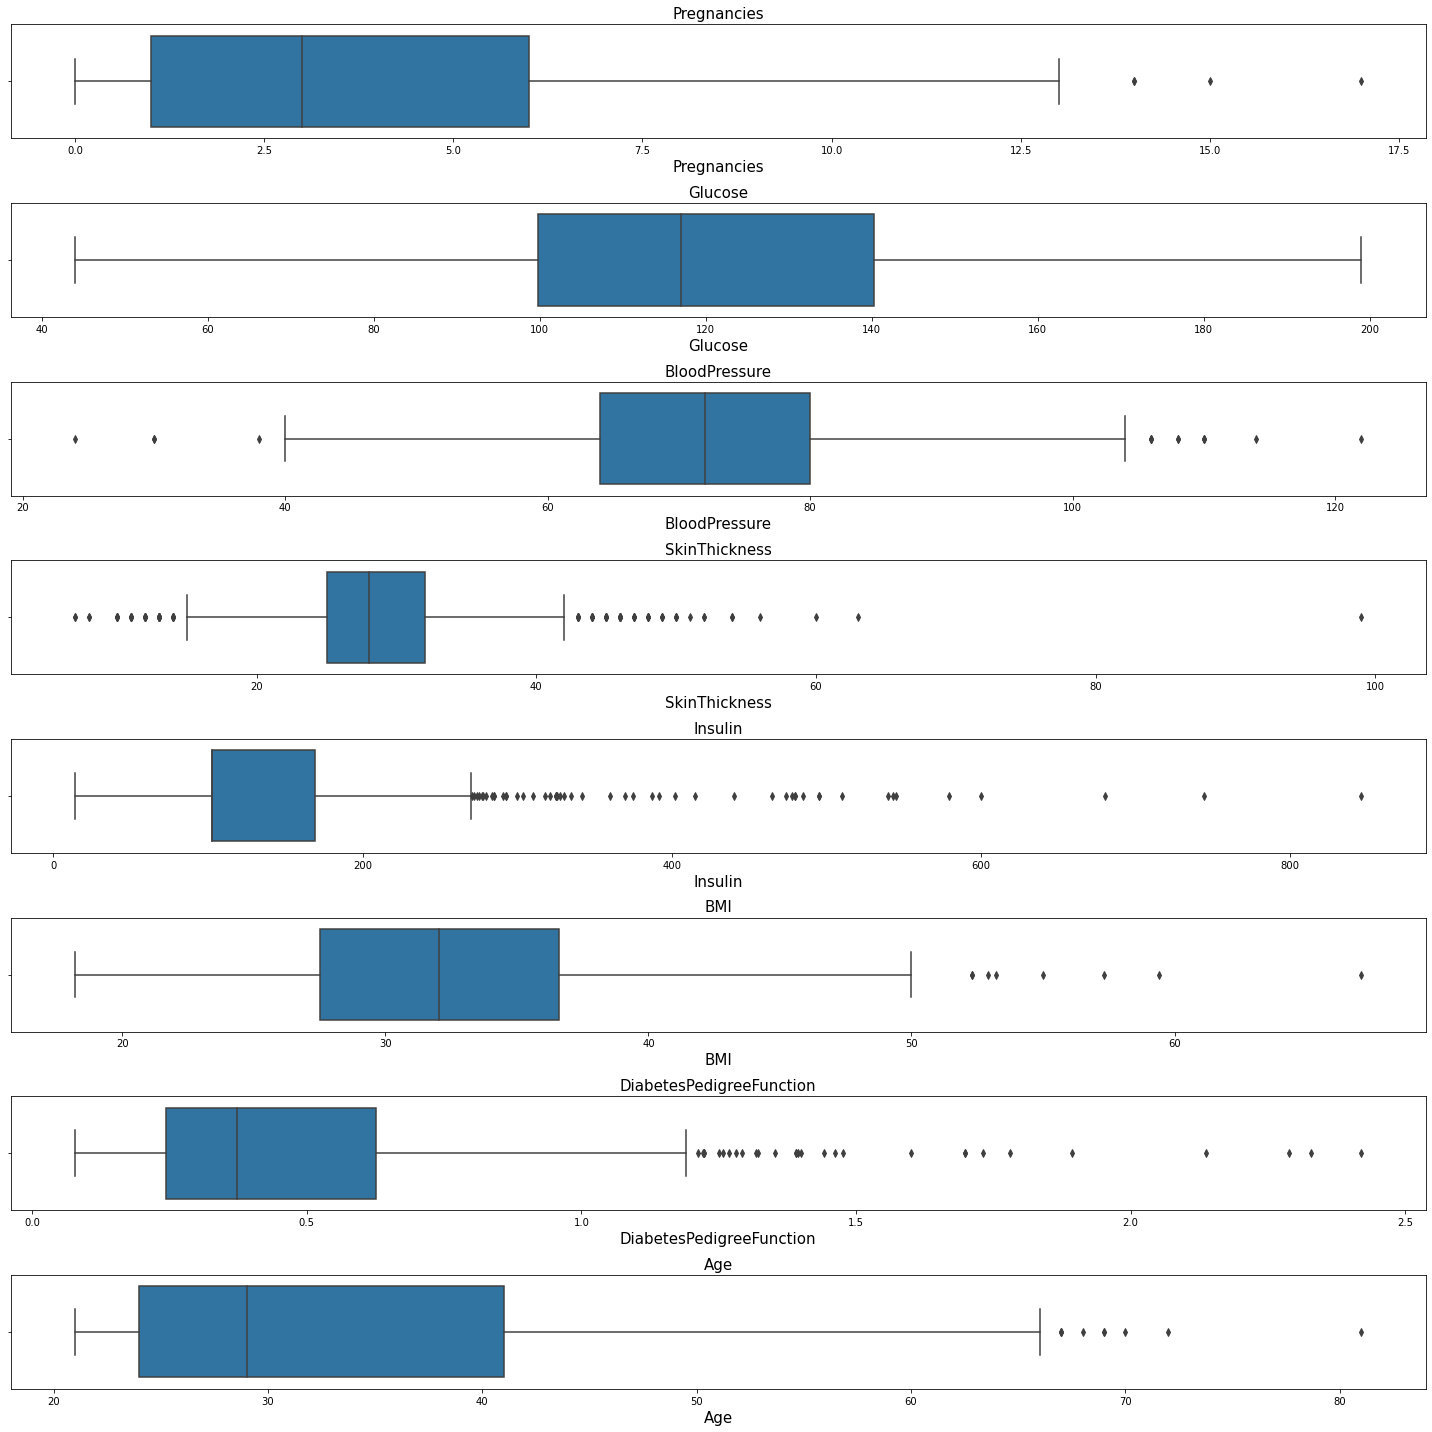

In [33]:
boxplot(df , num_cols)

In [34]:
for col in num_cols:
    print("For {} Outliers : {}".format(col.upper(),check_outliers(df , col)))

For PREGNANCIES Outliers : There Are Outliers
For GLUCOSE Outliers : There Are Not Outliers
For BLOODPRESSURE Outliers : There Are Outliers
For SKINTHICKNESS Outliers : There Are Outliers
For INSULIN Outliers : There Are Outliers
For BMI Outliers : There Are Outliers
For DIABETESPEDIGREEFUNCTION Outliers : There Are Outliers
For AGE Outliers : There Are Outliers


In [35]:
for col in num_cols:
    replace_with_thresholds(df ,col)

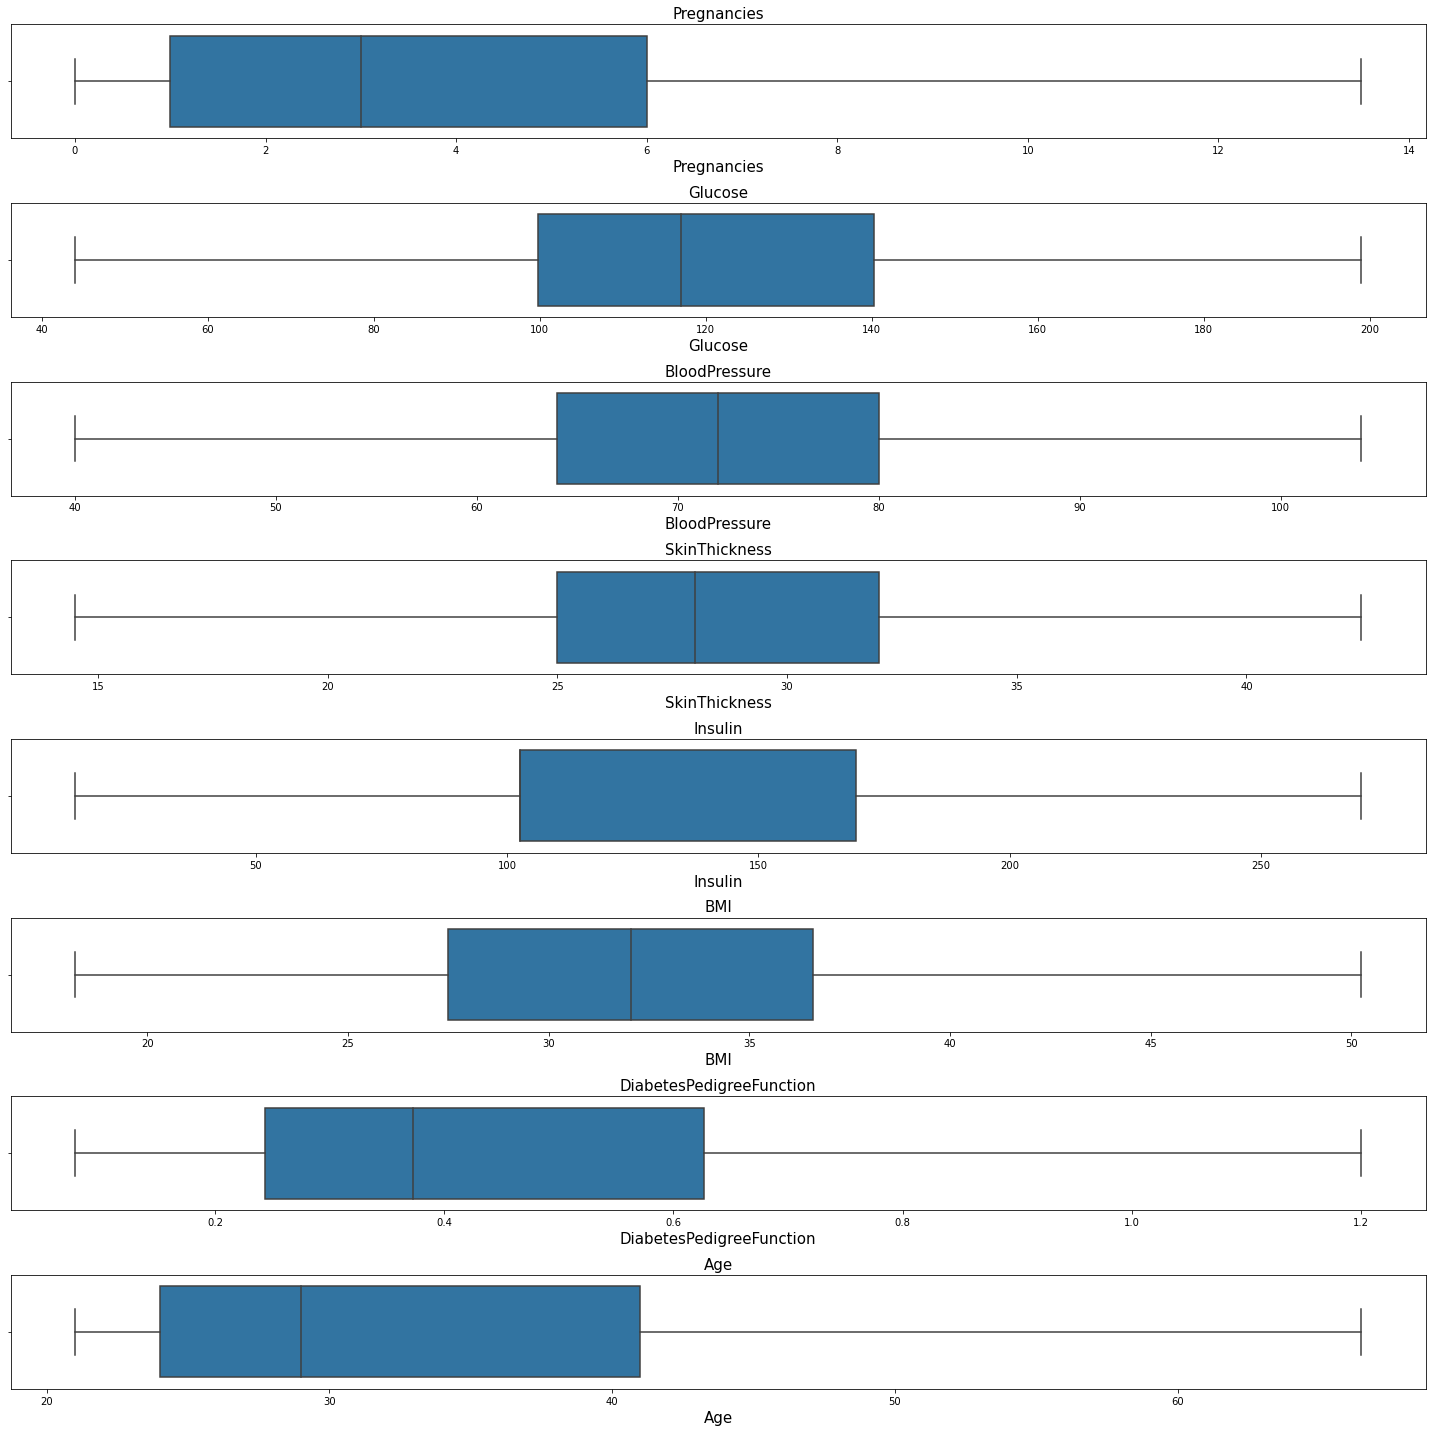

In [36]:
boxplot(df,num_cols)

In [37]:
for col in num_cols:
    print("For {} Outliers : {}".format(col.upper(),check_outliers(df , col)))

For PREGNANCIES Outliers : There Are Not Outliers
For GLUCOSE Outliers : There Are Not Outliers
For BLOODPRESSURE Outliers : There Are Not Outliers
For SKINTHICKNESS Outliers : There Are Not Outliers
For INSULIN Outliers : There Are Not Outliers
For BMI Outliers : There Are Not Outliers
For DIABETESPEDIGREEFUNCTION Outliers : There Are Not Outliers
For AGE Outliers : There Are Not Outliers


In [38]:
check_df(df)

##################### SHAPE ######################

(768, 9)

##################### TYPES ######################

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

###################### HEAD ######################

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction     Age  Outcome
0       6.0000 148.0000        72.0000        35.0000 169.5000 33.6000                    0.6270 50.0000        1
1       1.0000  85.0000        66.0000        29.0000 102.5000 26.6000                    0.3510 31.0000        0
2       8.0000 183.0000        64.0000        32.0000 169.5000 23.3000                    0.6720 32.0000        1
3       1.0000  89.0000        66.0000 

## Feature Engineering

In [39]:
df[["BMI"]].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,768.0000,32.3728,6.6728,18.2000,27.5000,32.0500,36.6000,50.2500


In [40]:
bins = [0 ,18.4 ,24.9 ,29.9 ,100]
labels = ["Thin", "Normal", "OverWeight", "Obese"]
df["NEW_BMI"] = pd.cut(df["BMI"], bins = bins , labels = labels)

df[["NEW_BMI"]].describe().T

,count,unique,top,freq
NEW_BMI,768,4,Obese,483


In [41]:
# Converting BMI Values Categorically


def analyses(dataframe ,col ):
    
    print("".center(50,"#"), end = "\n\n")
    
    data = dataframe.groupby(col).agg({"Outcome" : ["mean","count"]})
    data.columns = ["Outcome_Mean" , "Outcome_Count"]
    print(data , end = "\n\n")
    
    print("".center(50,"#") , end = "\n\n")
    
    print(pd.DataFrame({"Ratio" : dataframe[col].value_counts() / len(dataframe) ,
                        "Value_Counts" : dataframe[col].value_counts()}) , end = "\n\n")
    
    print("".center(50,"#"), end = "\n\n")
    
    dataframe[col].value_counts().plot.pie( autopct = "%1.0f%%", shadow = True , figsize = (7,7))

##################################################

            Outcome_Mean  Outcome_Count
NEW_BMI                                
Thin              0.0000              4
Normal            0.0686            102
OverWeight        0.2235            179
Obese             0.4576            483

##################################################

            Ratio  Value_Counts
Obese      0.6289           483
OverWeight 0.2331           179
Normal     0.1328           102
Thin       0.0052             4

##################################################



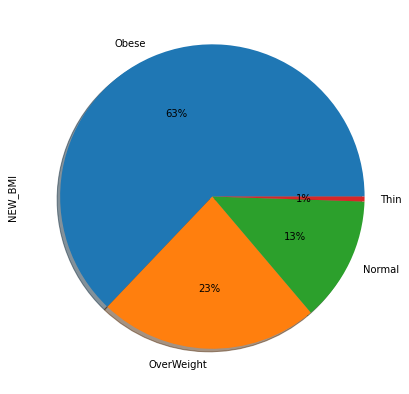

In [42]:
analyses(df , "NEW_BMI")

In [43]:
from scipy.stats import shapiro, kruskal, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

def shapiro_(df, cols_name , target):
    
    for col in cols_name :
    
        p_value = shapiro(df.loc[ df[target] == col , "Outcome"])[1]
        print(f"For {col} PValues : {round(p_value,4)}")
    
        if p_value > 0.05:
        
            print(f"For {col.upper()} , H0 : is the Normal Distribution...", end = "\n\n")
            
        else:
        
            print(f"For {col.upper()} , H1: Not Normal Distribution..." , end = "\n\n")

In [44]:
new_bmi = [col for col in df["NEW_BMI"].unique() if col not in "Thin"]

shapiro_(df , new_bmi, "NEW_BMI")

For Obese PValues : 0.0
For OBESE , H1: Not Normal Distribution...

For OverWeight PValues : 0.0
For OVERWEIGHT , H1: Not Normal Distribution...

For Normal PValues : 0.0
For NORMAL , H1: Not Normal Distribution...



In [45]:
p_value = kruskal(df.loc[df["NEW_BMI"] == "Normal", "Outcome"],
                  df.loc[df["NEW_BMI"] == "OverWeight", "Outcome"],
                  df.loc[df["NEW_BMI"] == "Obese", "Outcome"])[1]

p_value = round(p_value, 4)

one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"

if p_value > 0.05:
    
    print(f"For P_Value : {p_value}\n\n{one}")
    
    
else:
    
    print(f"For P_Value : {p_value}\n\n{two}")

For P_Value : 0.0

H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)


## 

In [46]:
# Converting Glucose Values Categorically

df[["Glucose"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0000,121.6771,30.4642,44.0000,99.7500,117.0000,140.2500,199.0000


In [47]:
bins = [0 , 140, 200, 300]
labels = ["NotDiabetes" , "PeriDiabetes", "Diabetes"]

df["NEW_GLUCOSE"] = pd.cut(df["Glucose"] , bins = bins , labels = labels)

df[["NEW_GLUCOSE"]].describe().T

,count,unique,top,freq
NEW_GLUCOSE,768,2,NotDiabetes,576


##################################################

              Outcome_Mean  Outcome_Count
NEW_GLUCOSE                              
NotDiabetes         0.2361            576
PeriDiabetes        0.6875            192
Diabetes               NaN              0

##################################################

              Ratio  Value_Counts
NotDiabetes  0.7500           576
PeriDiabetes 0.2500           192
Diabetes     0.0000             0

##################################################



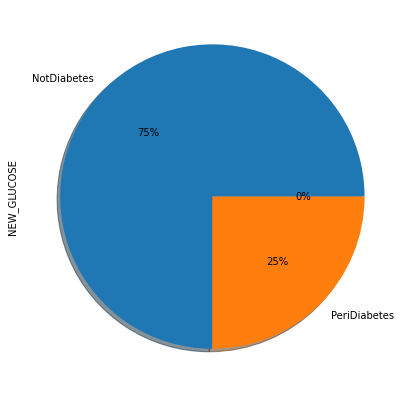

In [48]:
analyses(df , "NEW_GLUCOSE")

In [49]:
new_glucose = [col for col in df["NEW_GLUCOSE"].unique() if col not in "Diabetes"]

shapiro_(df , new_glucose , "NEW_GLUCOSE") 

For PeriDiabetes PValues : 0.0
For PERIDIABETES , H1: Not Normal Distribution...

For NotDiabetes PValues : 0.0
For NOTDIABETES , H1: Not Normal Distribution...



In [50]:
p_value = mannwhitneyu(df.loc[ df["NEW_GLUCOSE"] == "PeriDiabetes", "Outcome"],
                       df.loc[ df["NEW_GLUCOSE"] == "NotDiabetes", "Outcome"])[1]

p_value = round(p_value, 4)

one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"

if p_value > 0.05:
    
    print(f"For P_Value : {p_value}\n\n{one}")
    
else:
    
    print(f"For P_Value : {p_value}\n\n{two}")

For P_Value : 0.0

H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)


## 

In [51]:
# Converting Insulin Values Categorically

df[["Insulin"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,768.0000,133.0859,58.1242,14.0000,102.5000,102.5000,169.5000,270.0000


In [52]:
def Insulin(dataframe):
    
    insulin = dataframe["Insulin"]
    
    if 16 <= insulin <=166:
        
        return "Normal"
    
    else:
        
        return "AbNormal"

In [53]:
df["NEW_INSULIN"] = df.apply(Insulin, axis = 1)

df[["NEW_INSULIN"]].describe().T

,count,unique,top,freq
NEW_INSULIN,768,2,Normal,496


##################################################

             Outcome_Mean  Outcome_Count
NEW_INSULIN                             
AbNormal           0.7647            272
Normal             0.1210            496

##################################################

          Ratio  Value_Counts
Normal   0.6458           496
AbNormal 0.3542           272

##################################################



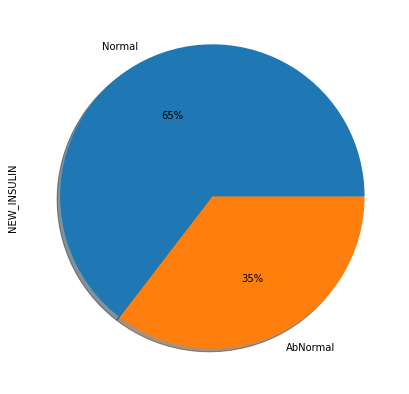

In [54]:
analyses(df , "NEW_INSULIN")

In [55]:
new_insulin = [col for col in df["NEW_INSULIN"].unique()]

shapiro_(df, new_insulin, "NEW_INSULIN")

For AbNormal PValues : 0.0
For ABNORMAL , H1: Not Normal Distribution...

For Normal PValues : 0.0
For NORMAL , H1: Not Normal Distribution...



In [56]:
p_value = mannwhitneyu(df.loc[ df["NEW_INSULIN"] == "Normal", "Outcome"],
                       df.loc[ df["NEW_INSULIN"] == "AbNormal", "Outcome"])[1]

p_value = round(p_value, 4)

one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"

if p_value > 0.05:
    
    print(f"For P_Value : {p_value}\n\n{one}")
    
else:
    
    print(f"For P_Value : {p_value}\n\n{two}")

For P_Value : 0.0

H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)


## 

In [57]:
# Converting age variable to categorical variable

df[["Age"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,768.0000,33.1999,11.6284,21.0000,24.0000,29.0000,41.0000,66.5000


In [58]:
df.loc[ (df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[ df["Age"] >= 50, "NEW_AGE_CAT"] = "senior"

##################################################

             Outcome_Mean  Outcome_Count
NEW_AGE_CAT                             
mature             0.3314            679
senior             0.4831             89

##################################################

        Ratio  Value_Counts
mature 0.8841           679
senior 0.1159            89

##################################################



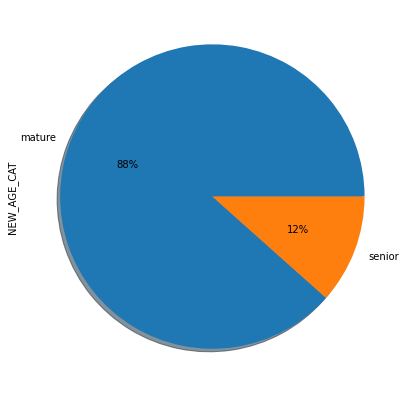

In [59]:
analyses(df, "NEW_AGE_CAT")

In [60]:
new_age_cat = [col for col in df["NEW_AGE_CAT"].unique()]

shapiro_(df, new_age_cat , "NEW_AGE_CAT")

For senior PValues : 0.0
For SENIOR , H1: Not Normal Distribution...

For mature PValues : 0.0
For MATURE , H1: Not Normal Distribution...



In [61]:
p_value = mannwhitneyu(df.loc[ df["NEW_AGE_CAT"] == "senior", "Outcome"],
                       df.loc[ df["NEW_AGE_CAT"] == "mature", "Outcome"])[1]

p_value = round(p_value, 4)

one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"

if p_value > 0.05:
    
    print(f"For P_Value : {p_value}\n\n{one}")
    
else:
    
    print(f"For P_Value : {p_value}\n\n{two}")

For P_Value : 0.0024

H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)


## 

In [62]:
##
df.loc[ (df["BMI"] < 18.4) & ((df["Age"] >=21) & (df["Age"] < 50)) , "NEW_BMI_AGE"] = "ThinMature"
df.loc[ (df["BMI"] < 18.4) & (df["Age"] >= 50), "NEW_BMI_AGE"] = "ThinSenior"


##
df.loc[ ((df["BMI"] >=18.4) & (df["BMI"] < 24.9)) & ((df["Age"] >=21) & (df["Age"] < 50)), \
      "NEW_BMI_AGE"] = "NormalMature"

df.loc[ ((df["BMI"] >= 18.4) & (df["BMI"] < 24.9)) & (df["Age"] >= 50), "NEW_BMI_AGE"] = "NormalSenior"

##
df.loc[ ((df["BMI"] >=24.9) & (df["BMI"] < 29.9)) & ((df["Age"] >=21) & (df["Age"] < 50)), \
      "NEW_BMI_AGE"] = "OverWeightMature"

df.loc[ ((df["BMI"] >= 24.9) & (df["BMI"] < 29.9)) & (df["Age"] >= 50), "NEW_BMI_AGE"] = "OverWeightSenior"

##
df.loc[ ((df["BMI"] >=29.9) & (df["BMI"] < 100)) & ((df["Age"] >=21) & (df["Age"] < 50)), \
      "NEW_BMI_AGE"] = "ObeseMature"

df.loc[ ((df["BMI"] >= 29.9) & (df["BMI"] < 100)) & (df["Age"] >= 50), "NEW_BMI_AGE"] = "ObeseSenior"


##################################################

                  Outcome_Mean  Outcome_Count
NEW_BMI_AGE                                  
NormalMature            0.0345             87
NormalSenior            0.2667             15
ObeseMature             0.4361            438
ObeseSenior             0.6400             50
OverWeightMature        0.2053            151
OverWeightSenior        0.2917             24
ThinMature              0.0000              3

##################################################

                  Ratio  Value_Counts
ObeseMature      0.5703           438
OverWeightMature 0.1966           151
NormalMature     0.1133            87
ObeseSenior      0.0651            50
OverWeightSenior 0.0312            24
NormalSenior     0.0195            15
ThinMature       0.0039             3

##################################################



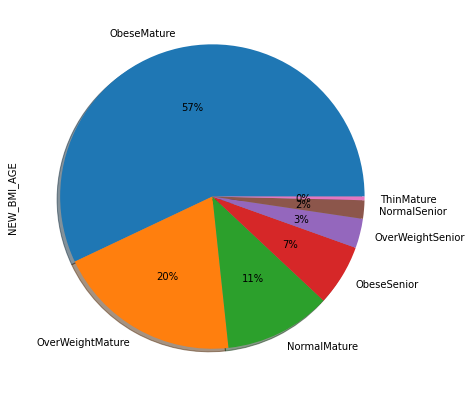

In [63]:
analyses(df, "NEW_BMI_AGE")

In [64]:
new_bmi_age = [col for col in df["NEW_BMI_AGE"].unique() if col not in "ThinMature"]

shapiro_(df ,new_bmi_age, "NEW_BMI_AGE")

For ObeseSenior PValues : 0.0
For OBESESENIOR , H1: Not Normal Distribution...

For OverWeightMature PValues : 0.0
For OVERWEIGHTMATURE , H1: Not Normal Distribution...

For NormalMature PValues : 0.0
For NORMALMATURE , H1: Not Normal Distribution...

For ObeseMature PValues : 0.0
For OBESEMATURE , H1: Not Normal Distribution...

For OverWeightSenior PValues : 0.0
For OVERWEIGHTSENIOR , H1: Not Normal Distribution...

For NormalSenior PValues : 0.0
For NORMALSENIOR , H1: Not Normal Distribution...



In [65]:
pvalue = kruskal(df.loc[df["NEW_BMI_AGE"] == "ObeseSenior" , "Outcome"],
                 df.loc[df["NEW_BMI_AGE"] == "OverWeightmature" , "Outcome"],
                 df.loc[df["NEW_BMI_AGE"] == "NormalMature" , "Outcome"],
                 df.loc[df["NEW_BMI_AGE"] == "ObeseMature" , "Outcome"],
                 df.loc[df["NEW_BMI_AGE"] == "OverWeightSenior" , "Outcome"],
                 df.loc[df["NEW_BMI_AGE"] == "NormalSenior" , "Outcome"])[1]

p_value = round(p_value, 4)

one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"

if p_value > 0.05:
    
    print(f"For P_Value : {p_value}\n\n{one}")
    
else:
    
    print(f"For P_Value : {p_value}\n\n{two}")

For P_Value : 0.0024

H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)


## 

In [66]:
###
df.loc[(df["Glucose"] < 140) & ((df["Age"] >=21) & (df["Age"] <50)) ,"NEW_AGE_GLUCOSE"] = "NotDiabetesMature"
df.loc[(df["Glucose"] < 140) & (df["Age"] >=50) , "NEW_AGE_GLUCOSE"] = "NotDiabetesSenior"

####
df.loc[((df["Glucose"] >= 140) & (df["Glucose"] < 200)) & ((df["Age"] >=21) & (df["Age"] <50)), \
       "NEW_AGE_GLUCOSE"] = "PeriDiabetesMature"

df.loc[((df["Glucose"] >= 140) & (df["Glucose"] < 200)) & (df["Age"] >= 50) , \
       "NEW_AGE_GLUCOSE"] = "PeriDiabetesSenior"

####
df.loc[((df["Glucose"] >= 200) & (df["Glucose"] < 300)) & ((df["Age"] >=21) & (df["Age"] <50)) \
       , "NEW_AGE_GLUCOSE"] = "DiabetesMature"

df.loc[((df["Glucose"] >=200) & (df["Glucose"] < 300)) & (df["Age"] >= 50),\
       "NEW_AGE_GLUCOSE"] = "DiabetesSenior"

In [67]:
df["NEW_AGE_GLUCOSE"].unique()

array(['PeriDiabetesSenior', 'NotDiabetesMature', 'PeriDiabetesMature',
       'NotDiabetesSenior'], dtype=object)

##################################################

                    Outcome_Mean  Outcome_Count
NEW_AGE_GLUCOSE                                
NotDiabetesMature         0.2275            523
NotDiabetesSenior         0.2609             46
PeriDiabetesMature        0.6795            156
PeriDiabetesSenior        0.7209             43

##################################################

                    Ratio  Value_Counts
NotDiabetesMature  0.6810           523
PeriDiabetesMature 0.2031           156
NotDiabetesSenior  0.0599            46
PeriDiabetesSenior 0.0560            43

##################################################



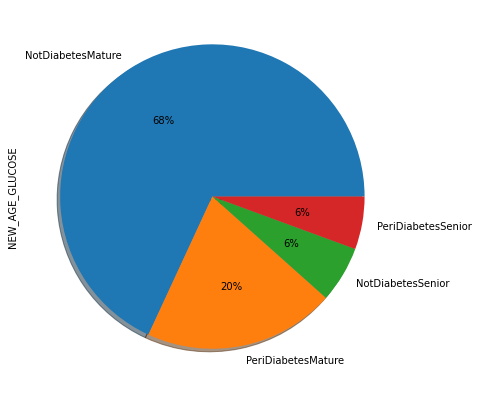

In [68]:
analyses(df, "NEW_AGE_GLUCOSE")

In [69]:
new_age_glucose = [col for col in df["NEW_AGE_GLUCOSE"].unique()]

shapiro_(df,new_age_glucose, "NEW_AGE_GLUCOSE")

For PeriDiabetesSenior PValues : 0.0
For PERIDIABETESSENIOR , H1: Not Normal Distribution...

For NotDiabetesMature PValues : 0.0
For NOTDIABETESMATURE , H1: Not Normal Distribution...

For PeriDiabetesMature PValues : 0.0
For PERIDIABETESMATURE , H1: Not Normal Distribution...

For NotDiabetesSenior PValues : 0.0
For NOTDIABETESSENIOR , H1: Not Normal Distribution...



In [70]:
p_value = kruskal(df.loc[df["NEW_AGE_GLUCOSE"] == "PeriDiabetesSenior", "Outcome" ],
                  df.loc[df["NEW_AGE_GLUCOSE"] == "NotDiabetesMature", "Outcome" ],
                  df.loc[df["NEW_AGE_GLUCOSE"] == "PeriDiabetesMature", "Outcome" ],
                  df.loc[df["NEW_AGE_GLUCOSE"] == "NotDiabetesSenior", "Outcome" ])[1]

p_value = round(p_value,4)

p_value = round(p_value, 4)

one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"

if p_value > 0.05:
    
    print(f"For P_Value : {p_value}\n\n{one}")
    
else:
    
    print(f"For P_Value : {p_value}\n\n{two}")

For P_Value : 0.0

H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)


In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_BMI,NEW_GLUCOSE,NEW_INSULIN,NEW_AGE_CAT,NEW_BMI_AGE,NEW_AGE_GLUCOSE
0,6.0000,148.0000,72.0000,35.0000,169.5000,33.6000,0.6270,50.0000,1,Obese,PeriDiabetes,AbNormal,senior,ObeseSenior,PeriDiabetesSenior
1,1.0000,85.0000,66.0000,29.0000,102.5000,26.6000,0.3510,31.0000,0,OverWeight,NotDiabetes,Normal,mature,OverWeightMature,NotDiabetesMature
2,8.0000,183.0000,64.0000,32.0000,169.5000,23.3000,0.6720,32.0000,1,Normal,PeriDiabetes,AbNormal,mature,NormalMature,PeriDiabetesMature
3,1.0000,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,21.0000,0,OverWeight,NotDiabetes,Normal,mature,OverWeightMature,NotDiabetesMature
4,0.0000,137.0000,40.0000,35.0000,168.0000,43.1000,1.2000,33.0000,1,Obese,NotDiabetes,AbNormal,mature,ObeseMature,NotDiabetesMature


## Label_Encoding and One-Hot Enconding İşlemleri

In [72]:
def nunique_dtypes(dataframe):
    
    data = pd.DataFrame()
    data["Name"] = [col for col in dataframe.columns ]
    data["Nunique"] = [dataframe[col].nunique() for col in dataframe.columns]
    data["Dtypes"] = [dataframe[col].dtype for col in dataframe.columns]
    return data

nunique_dtypes(df)

,Name,Nunique,Dtypes
0,Pregnancies,15,float64
1,Glucose,135,float64
2,BloodPressure,39,float64
3,SkinThickness,30,float64
4,Insulin,142,float64
5,BMI,241,float64
6,DiabetesPedigreeFunction,490,float64
7,Age,47,float64
8,Outcome,2,int64
9,NEW_BMI,4,category


In [73]:
cat_cols , num_cols, cat_but_car = grab_col_names(df, details=True)

Observations : 768
Variables : 15
Cat Cols : 7
Num Cols : 8
Cat But Car : 0
Num But Cat : 3


In [74]:
print("Cat Cols :\n", cat_cols,end = "\n\n")
print("Num Cols :\n", num_cols,end = "\n\n")
print("Cat But Car :\n ", cat_but_car)

Cat Cols :
 ['NEW_INSULIN', 'NEW_AGE_CAT', 'NEW_BMI_AGE', 'NEW_AGE_GLUCOSE', 'Outcome', 'NEW_BMI', 'NEW_GLUCOSE']

Num Cols :
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Cat But Car :
  []


In [75]:
new_cat_cols = [col for col in cat_cols if col not in "Outcome"]
new_cat_cols

['NEW_INSULIN',
 'NEW_AGE_CAT',
 'NEW_BMI_AGE',
 'NEW_AGE_GLUCOSE',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [76]:
for col in new_cat_cols:
    label_encoder(df , col)

In [77]:
nunique_dtypes(df)

,Name,Nunique,Dtypes
0,Pregnancies,15,float64
1,Glucose,135,float64
2,BloodPressure,39,float64
3,SkinThickness,30,float64
4,Insulin,142,float64
5,BMI,241,float64
6,DiabetesPedigreeFunction,490,float64
7,Age,47,float64
8,Outcome,2,int64
9,NEW_BMI,4,int64


In [78]:
df = one_hot_encoder(df , new_cat_cols,drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_INSULIN_1,NEW_AGE_CAT_1,NEW_BMI_AGE_1,NEW_BMI_AGE_2,NEW_BMI_AGE_3,NEW_BMI_AGE_4,NEW_BMI_AGE_5,NEW_BMI_AGE_6,NEW_AGE_GLUCOSE_1,NEW_AGE_GLUCOSE_2,NEW_AGE_GLUCOSE_3,NEW_BMI_1,NEW_BMI_2,NEW_BMI_3,NEW_GLUCOSE_1
0,6.0000,148.0000,72.0000,35.0000,169.5000,33.6000,0.6270,50.0000,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1
1,1.0000,85.0000,66.0000,29.0000,102.5000,26.6000,0.3510,31.0000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,8.0000,183.0000,64.0000,32.0000,169.5000,23.3000,0.6720,32.0000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1.0000,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,21.0000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.0000,137.0000,40.0000,35.0000,168.0000,43.1000,1.2000,33.0000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [79]:
cat_cols , num_cols, cat_but_car = grab_col_names(df,details=True)

Observations : 768
Variables : 24
Cat Cols : 16
Num Cols : 8
Cat But Car : 0
Num But Cat : 16


In [80]:
print("Cat Cols :\n", cat_cols,end = "\n\n")
print("Num Cols :\n", num_cols,end = "\n\n")
print("Cat But Car :\n ", cat_but_car)

Cat Cols :
 ['Outcome', 'NEW_INSULIN_1', 'NEW_AGE_CAT_1', 'NEW_BMI_AGE_1', 'NEW_BMI_AGE_2', 'NEW_BMI_AGE_3', 'NEW_BMI_AGE_4', 'NEW_BMI_AGE_5', 'NEW_BMI_AGE_6', 'NEW_AGE_GLUCOSE_1', 'NEW_AGE_GLUCOSE_2', 'NEW_AGE_GLUCOSE_3', 'NEW_BMI_1', 'NEW_BMI_2', 'NEW_BMI_3', 'NEW_GLUCOSE_1']

Num Cols :
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Cat But Car :
  []


In [81]:
for col in num_cols:
    print(f"For {col.upper()} Outliers : {check_outliers(df ,col)}",end = "\n\n")

For PREGNANCIES Outliers : There Are Not Outliers

For GLUCOSE Outliers : There Are Not Outliers

For BLOODPRESSURE Outliers : There Are Not Outliers

For SKINTHICKNESS Outliers : There Are Not Outliers

For INSULIN Outliers : There Are Not Outliers

For BMI Outliers : There Are Not Outliers

For DIABETESPEDIGREEFUNCTION Outliers : There Are Not Outliers

For AGE Outliers : There Are Not Outliers



In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_INSULIN_1,NEW_AGE_CAT_1,NEW_BMI_AGE_1,NEW_BMI_AGE_2,NEW_BMI_AGE_3,NEW_BMI_AGE_4,NEW_BMI_AGE_5,NEW_BMI_AGE_6,NEW_AGE_GLUCOSE_1,NEW_AGE_GLUCOSE_2,NEW_AGE_GLUCOSE_3,NEW_BMI_1,NEW_BMI_2,NEW_BMI_3,NEW_GLUCOSE_1
0,0.6471,0.8646,-0.0308,0.8143,0.6269,0.1840,0.5889,1.4457,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1
1,-0.8490,-1.2047,-0.5437,0.0201,-0.5266,-0.8657,-0.3781,-0.1893,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1.2456,2.0143,-0.7146,0.4172,0.6269,-1.3606,0.7466,-0.1033,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,-0.8490,-1.0733,-0.5437,-0.7742,-0.6729,-0.6407,-1.0228,-1.0498,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,-1.1482,0.5033,-2.7661,0.8143,0.6011,1.6087,2.5966,-0.0172,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [83]:
X = df.drop("Outcome" , axis = 1)
y = df["Outcome"]

## Model 

## Success Evaluation (Validation) with Holdout Method

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.metrics import r2_score,f1_score,precision_score,recall_score,accuracy_score,\
                            confusion_matrix,classification_report,roc_auc_score,roc_curve

from sklearn.model_selection import train_test_split

In [85]:
def score_test(model , X , y , roc_plot = True , matrix = True):
    
    X_train, X_test, y_train, y_test= train_test_split(X ,y, test_size=0.2,random_state = 42)
    
    model.fit(X_train, y_train)
    
    y_pred_test= model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:,1]
    
    print("".center(50,"#"))
    print(f"{type(model).__name__}".center(50," "))
    print("".center(50,"#"), end = "\n\n")
    print("classification report".upper().center(50," "),end = "\n\n")
    print(classification_report(y_test, y_pred_test))
    
    print(" test scores ".upper().center(50,"#"),end = "\n\n")
    print(" accuracy score :".upper(), accuracy_score(y_test,y_pred_test),end = "\n\n")
    print(" precison score :".upper() , precision_score(y_test,y_pred_test),end = "\n\n")
    print(" recall score :".upper(), recall_score(y_test,y_pred_test),end = "\n\n")
    print(" f1 score :".upper(), f1_score(y_test,y_pred_test),end = "\n\n")
    print(" r2 score :".upper(), r2_score(y_test,y_pred_test),end = "\n\n")
    print(" roc auc score :".upper() , roc_auc_score(y_test , y_proba_test),end = "\n\n")
    print("".center(50,"#"))
    
    if roc_plot:
        
        roc_score =roc_auc_score(y_test , y_proba_test)
        
        fpr, tpr, threshols = roc_curve(y_test, y_proba_test)
        
        plt.figure(figsize = (10,7))
        plt.plot(fpr, tpr)
        plt.plot([0,1], [0,1], "--r")
        plt.xlim([-0.05,1.0])
        plt.ylim([0.0,1.1])
        size = 15
        plt.title("AUC (Area : %.3f)" % roc_score , fontsize = size)
        plt.xlabel("False Positive Rate" , fontsize = size)
        plt.ylabel("True Positive Rate" , fontsize = size)
        plt.show()
        
    if matrix :
        
        fig , axes = plt.subplots(figsize = (7,5))
        
        cm = confusion_matrix(y_test ,y_pred_test)
        ax = sns.heatmap(cm, annot=True , annot_kws={"size" : 23} , fmt = ".3g" , ax = axes,
                         cmap = "rainbow", linewidths=3, linecolor="white",cbar = False, center = 0)
        
        plt.xlabel(" Predict Label ", fontsize = size)
        plt.ylabel(" True Label ", fontsize = size)
        plt.title(f" Confusion Matrix For {type(model).__name__.upper()}", fontsize = size)
        plt.show()

##################################################
                LogisticRegression                
##################################################

              CLASSIFICATION REPORT               

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        99
           1       0.77      0.80      0.79        55

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.85      0.84      0.84       154

################## TEST SCORES ###################

 ACCURACY SCORE : 0.8441558441558441

 PRECISON SCORE : 0.7719298245614035

 RECALL SCORE : 0.8

 F1 SCORE : 0.7857142857142858

 R2 SCORE : 0.32121212121212106

 ROC AUC SCORE : 0.9079889807162534

##################################################


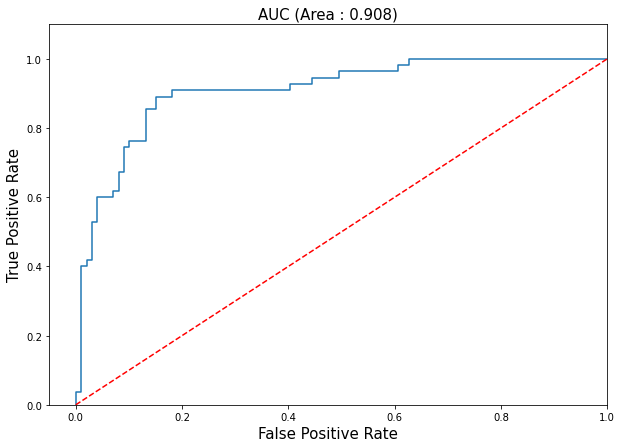

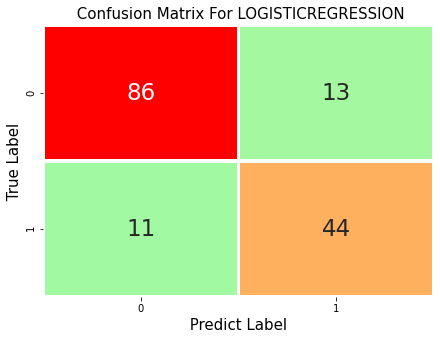

In [86]:
score_test(LogisticRegression() , X, y)

## Success Evaluation with CV and Hyperparameter Optimization with GridSearchCV

In [87]:
logistic_param_grid ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                 'C' : np.logspace(-4, 4, 5),
                 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                 'max_iter' : [100, 1000, 2500, 5000]
                 }

models = [("LR",LogisticRegression(),logistic_param_grid)]

In [88]:
from sklearn.model_selection import cross_validate

def base_model(models , X, y, cv = 5):
    
    data = pd.DataFrame()
    index = 0
    
    for name, model, params in models:
        
            results = cross_validate(estimator=model,
                                     X= X ,
                                     y= y,
                                     cv= cv,
                                     scoring = ["accuracy","roc_auc"],
                                     n_jobs=-1,
                                     verbose=0)
    
            data.loc[index,"NAME"] = name
            data.loc[index,"ROC_AUC"] = results["test_roc_auc"].mean()
            data.loc[index,"ACCURACY"] = results["test_accuracy"].mean()
            data.loc[index,"FIT_TIME"] = results["fit_time"].mean()
            data.loc[index,"SCORE_TIME"] = results["score_time"].mean()
            
            index+=1
    
    data = data.set_index("NAME")
    return data


In [89]:
base_model(models,X, y, cv = 5)

,ROC_AUC,ACCURACY,FIT_TIME,SCORE_TIME
NAME,,,,
LR,0.9068,0.8515,0.0088,0.0032


In [90]:
def hyperparamters_optimizer(models,X,y,cv = 5):
    
    models_dict = {}
    data = pd.DataFrame()
    index = 0
    
    for name, model, params in models:
        
        cv_results = cross_validate(estimator=model,
                                    X = X,
                                    y = y,
                                    cv = cv,
                                    scoring=["accuracy","roc_auc"],
                                    n_jobs=-1,
                                    verbose = 0)
        
        before_roc_auc = cv_results["test_roc_auc"].mean()
        before_accuracy = cv_results["test_accuracy"].mean()
        
        print("".center(50,"#"),end = "\n\n")
        print(f"NAME : {name.upper()}",end= "\n\n")
        print(f"Before GridSearch\n\nRoc Auc : {before_roc_auc}\nAccuracy : {before_accuracy}",end="\n\n")
        #print("".center(50,"#"),end = "\n\n") 
        
        
        best_grid = GridSearchCV(estimator=model,
                                 param_grid=params,
                                 cv = cv , 
                                 n_jobs=-1,
                                 verbose=0,
                                 scoring="roc_auc").fit(X,y)
        
        print(f"Best Params : {best_grid.best_params_}")
        
        final_model = model.set_params(**best_grid.best_params_)
        
        final_cv_results = cross_validate(estimator=final_model,
                                          X = X,
                                          y = y,
                                          cv = cv,
                                          scoring=["accuracy","roc_auc"],
                                          n_jobs=-1,
                                          verbose=0)
        
        final_roc_auc = final_cv_results["test_roc_auc"].mean()
        final_accuracy = final_cv_results["test_accuracy"].mean()
        
        print(f"\nAfter GridSearch\n\nRoc Auc : {final_roc_auc}\nAccuracy : {final_accuracy}",end="\n\n")
        print("".center(50,"#"),end="\n\n")
        
        data.loc[index , "NAME"] = name
        data.loc[index , "Before ROC_AUC"] = before_roc_auc
        data.loc[index , "After ROC_AUC"] = final_roc_auc
        data.loc[index, "Before ACCURACY"] = before_accuracy
        data.loc[index, "After ACCURACY"] = final_accuracy
        index+=1
        
        models_dict[name] = final_model
    
    data = data.set_index("NAME")
    
    return data , models_dict
        

In [91]:
data , models_dict = hyperparamters_optimizer(models,X,y, cv = 10)

##################################################

NAME : LR

Before GridSearch

Roc Auc : 0.9080256410256411
Accuracy : 0.8436773752563227

Best Params : {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

After GridSearch

Roc Auc : 0.9082450142450142
Accuracy : 0.8436773752563227

##################################################



In [92]:
data

,Before ROC_AUC,After ROC_AUC,Before ACCURACY,After ACCURACY
NAME,,,,
LR,0.9080,0.9082,0.8437,0.8437


In [93]:
models_dict["LR"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [94]:
def roc_auc_graph(model, X ,y):
        
        model.fit(X,y)
        
        y_proba = model.predict_proba(X)[:,1]
        roc_score =roc_auc_score(y , y_proba)
        
        fpr, tpr, threshols = roc_curve(y, y_proba)
        
        plt.figure(figsize = (10,7))
        plt.plot(fpr, tpr)
        plt.plot([0,1], [0,1], "--r")
        plt.xlim([-0.05,1.0])
        plt.ylim([0.0,1.1])
        size = 15
        plt.title("AUC (Area : %.3f)" % roc_score , fontsize = size)
        plt.xlabel("False Positive Rate" , fontsize = size)
        plt.ylabel("True Positive Rate" , fontsize = size)
        plt.show()
        
def confusion_matrix_graph(model, X ,y):
        
        y_pred = model.predict(X)
        
        fig , axes = plt.subplots(figsize = (7,5))
        
        size = 15
        cm = confusion_matrix(y ,y_pred)
        ax = sns.heatmap(cm, annot=True , annot_kws={"size" : 23} , fmt = ".3g" , ax = axes,
                         cmap = "rainbow", linewidths=3, linecolor="white",cbar = False, center = 0)
        
        plt.xlabel(" Predict Label ", fontsize = size)
        plt.ylabel(" True Label ", fontsize = size)
        plt.title(f" Confusion Matrix For {type(model).__name__.upper()}", fontsize = size)
        plt.show()

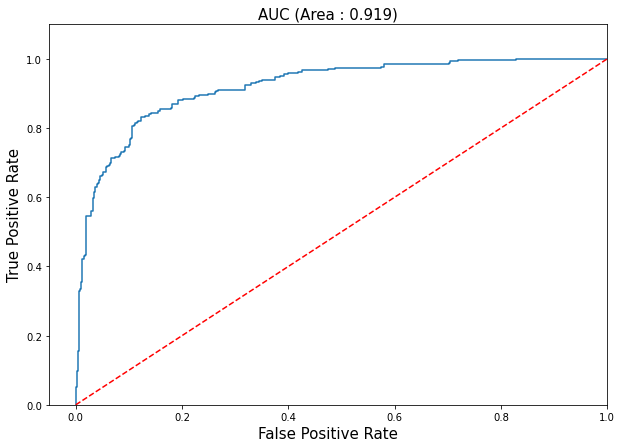

In [95]:
roc_auc_graph(models_dict["LR"], X ,y)

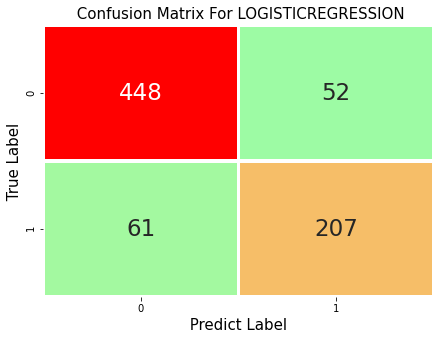

In [96]:
confusion_matrix_graph(models_dict["LR"], X ,y)

In [97]:
# save final_model
import pickle

for name,model,params in models:
    
    pd.to_pickle(models_dict[name], open(name+"_diabetes.pkl","wb"))

In [98]:
pd.to_pickle(df, open("diabetes.pkl","wb"))